/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


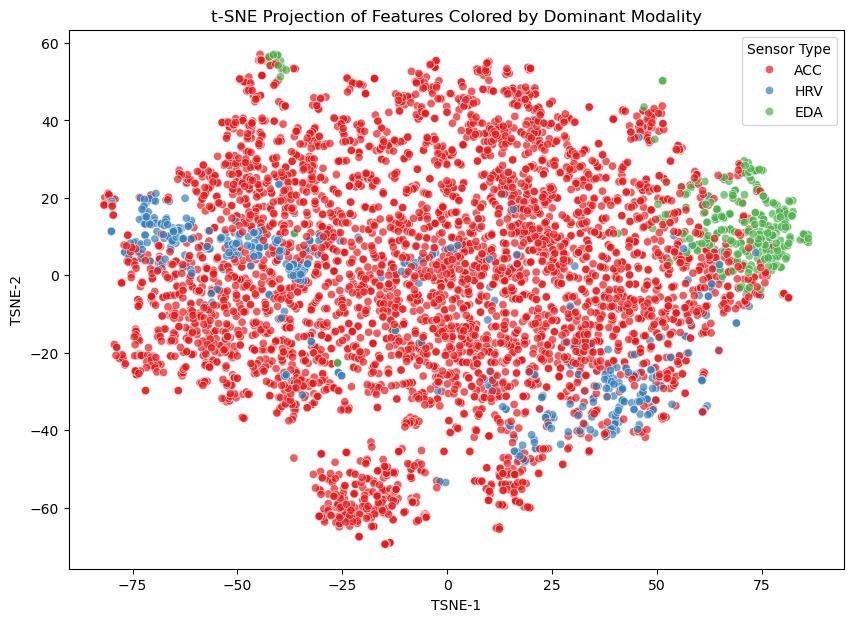

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the dataset
file_path = "processed_dataset_with_clusters.csv"
df = pd.read_csv(file_path)

# Separate features and target variables
feature_columns = df.columns[:-5]  # Excluding the last 5 columns (target variables)
target_columns = df.columns[-5:]   # Last 5 columns are target variables
features = df[feature_columns]

# Normalize features using StandardScaler (Z-score normalization)
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
df_normalized = pd.DataFrame(normalized_features, columns=feature_columns)

# Define sensor modalities
modalities = {
    "HRV": [col for col in feature_columns if "hrv" in col],
    "ACC": [col for col in feature_columns if "acc" in col],
    "EDA": [col for col in feature_columns if "eda" in col]
}

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_results = tsne.fit_transform(df_normalized)

# Determine dominant modality per row based on summed absolute values
df_modality_sums = {
    "HRV": df_normalized[modalities["HRV"]].abs().sum(axis=1),
    "ACC": df_normalized[modalities["ACC"]].abs().sum(axis=1),
    "EDA": df_normalized[modalities["EDA"]].abs().sum(axis=1),
}

# Create a DataFrame from modality sums
df_modality_sums = pd.DataFrame(df_modality_sums)

# Assign dominant modality per row
df_tsne = pd.DataFrame(tsne_results, columns=["TSNE-1", "TSNE-2"])
df_tsne["Dominant Modality"] = df_modality_sums.idxmax(axis=1)  # Assign the modality with the highest sum

# Plot corrected t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_tsne, x="TSNE-1", y="TSNE-2", hue="Dominant Modality", alpha=0.7, palette="Set1")
plt.title("t-SNE Projection of Features Colored by Dominant Modality")
plt.legend(title="Sensor Type")
plt.show()
